# Udacity DS Nanodegree project 1: Analysis of Airbnb (Seattle) data

__Three questions with business or real-world application__


The US has experienced the problem of stagnant income growth of middle class for quite sometimes.  This question will shade some light on how Airbnb can help the middle class of the US in raising their income.  It will seek to answer the following three questions with descriptive statistics:

- How large is middle income class renting accommodation on Airbnb in Seattle as compared for lardlord?
- How many of them are "superhost"?
- Does being "superhost" help their businesses on Airbnb?

__Load necessary library and data__

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [75]:
df = pd.read_csv("listings.csv")

__Question 1: Identify listing made by middle income class__

To identify listing from middle income class, it is possible to look at variable "availability_365" which identify how many days in the year the accommodation is in Airbnb market.  Middle income class are likely to rent out their own home so their value of "availability_365" is likely to be small

In [ ]:
#examine variable "availability_365"

In [79]:
df['availability_365'].isnull().sum() #there are no row with NaN

0

In [84]:
df[df['availability_365'] == 0].shape[0] #there are 95 listing which are not made available for the whole year

95

In [85]:
df = df[df['availability_365'] != 0] #let's remove those 95 listing as it does not make sense and they account to just small proportion of overall listing

In [ ]:
#transform "availability_365"

In [86]:
def create_availability_range(row):
    if row['availability_365'] >0 and row['availability_365'] <= 100:
        return 'between 1-100'
    if row['availability_365'] >100 and row['availability_365'] <= 200:
        return 'between 101-200'
    if row['availability_365'] >200 and row['availability_365'] <= 300:
        return 'between 201-300'
    if row['availability_365'] >300:
        return 'more than 300'
    else:
        return '0'

In [87]:
df['availability_365_range'] = df.apply(lambda row: create_availability_range(row), axis=1)

In [ ]:
#investigate availability_365_range

In [98]:
table1 = df[['availability_365_range', 'id']].groupby('availability_365_range').agg('count')

In [99]:
table1

,id
availability_365_range,
between 1-100,736
between 101-200,573
between 201-300,423
more than 300,1991


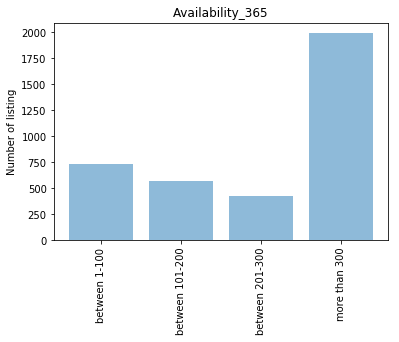

In [105]:
objects = table1.index
y_pos = np.arange(len(objects))
value = table1['id']
plt.bar(y_pos, value, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Number of listing')
plt.title('Availability_365')
plt.xticks(rotation=90)

plt.show()

Finding: Around 750 accommodation are owned by middle class as they rent out their accommmodation for relatively less period of time (a period of less than 100 days), while as many as 2000 accommodations are owned by landlord who rent out their accommodation for more than 300 days in a year

__Question 2: How many of them are superhost?__

In [106]:
table2 = df[['availability_365_range', 'host_is_superhost', 'id']].groupby(['availability_365_range', 'host_is_superhost']).agg('count')

In [109]:
table2 = table2.reset_index()

In [110]:
table2

,availability_365_range,host_is_superhost,id
0,between 1-100,f,597
1,between 1-100,t,137
2,between 101-200,f,422
3,between 101-200,t,151
4,between 201-300,f,330
5,between 201-300,t,93
6,more than 300,f,1610
7,more than 300,t,381


In [114]:
superhost_breakdown = table2[table2['host_is_superhost']=='t']['id']

In [115]:
notsuperhost_breakdown = table2[table2['host_is_superhost']=='f']['id']

In [122]:
proportion_of_superhost = np.array(superhost_breakdown) / (np.array(superhost_breakdown) + np.array(notsuperhost_breakdown))

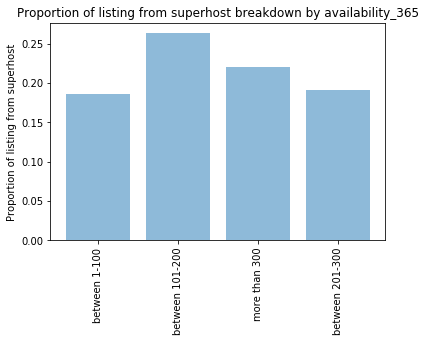

In [126]:
objects = list(set(table2.availability_365_range))
y_pos = np.arange(len(objects))
value = proportion_of_superhost
plt.bar(y_pos, value, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Proportion of listing from superhost')
plt.title('Proportion of listing from superhost breakdown by availability_365')
plt.xticks(rotation=90)

plt.show()

Finding: Proportion of listing who is superhost is the lowest among accommodation rent out by middle class (i.e. those listing with availability_365 <= 100).  Middle class can improve their business on Airbnb by trying to transform themselves into superhost

__Question 3: Does being "superhost" help businesses on Airbnb?__

First, we need to engineer features which reflect business performances

In [134]:
df[df['guests_included'] == 0].shape[0] # Let's remove these row as it will make our engineered features below turn into infinity.  Their size is relatively small

0

In [135]:
df = df[df['guests_included'] != 0] #remove rows where guest_included == 0

In [136]:
df['price_convert'] = df['price'].replace('[\$,]', '', regex=True).astype(float)
df['adjusted price'] = df['price_convert'] / df['guests_included'] #calculate price per head per night

In [149]:
df['implied occupancy'] = df['reviews_per_month']*12 / df['availability_365'] # try to imply occupancy rate from reviews data

Compare price per head per night and occupacy rate between accommodation listed with superhost and those who are not superhost

In [161]:
table3 = df[['host_is_superhost', 'availability_365_range', 'adjusted price']].groupby(['availability_365_range', 'host_is_superhost']).agg('mean')

In [162]:
table3

adjusted price
availability_365_range host_is_superhost                
between 1-100          f                       87.749211
                       t                       77.157895
between 101-200        f                      104.329517
                       t                       79.596939
between 201-300        f                      100.929323
                       t                       85.911049
more than 300          f                       93.974213
                       t                       84.624060

In [163]:
table4 = df[['host_is_superhost', 'availability_365_range', 'implied occupancy']].groupby(['availability_365_range', 'host_is_superhost']).agg('mean')

In [170]:
table4

implied occupancy
availability_365_range host_is_superhost                   
between 1-100          f                           0.833952
                       t                           1.077102
between 101-200        f                           0.128132
                       t                           0.255485
between 201-300        f                           0.080420
                       t                           0.121331
more than 300          f                           0.062280
                       t                           0.103748

In [171]:
table3 = table3.reset_index()
table4 = table4.reset_index()

In [179]:
superhost_price = list(table3[table3['host_is_superhost']=='t']['adjusted price'])
notsuperhost_price = list(table3[table3['host_is_superhost']=='f']['adjusted price'])
superhost_occupacy = list(table4[table3['host_is_superhost']=='t']['implied occupancy'])
notsuperhost_occupacy = list(table4[table3['host_is_superhost']=='f']['implied occupancy'])
objects = list(set(table2.availability_365_range))

In [177]:
superhost_occupacy

,availability_365_range,host_is_superhost,implied occupancy
1,between 1-100,t,1.077102
3,between 101-200,t,0.255485
5,between 201-300,t,0.121331
7,more than 300,t,0.103748


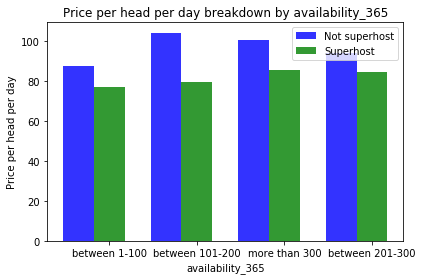

In [183]:
n_groups = 4

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, notsuperhost_price, bar_width,
alpha=opacity,
color='b',
label='Not superhost')

rects2 = plt.bar(index + bar_width, superhost_price, bar_width,
alpha=opacity,
color='g',
label='Superhost')

plt.xlabel('availability_365')
plt.ylabel('Price per head per day')
plt.title('Price per head per day breakdown by availability_365')
plt.xticks(index + bar_width, objects)
plt.legend()

plt.tight_layout()
plt.show()

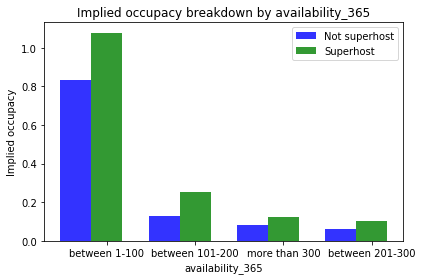

In [184]:
n_groups = 4

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, notsuperhost_occupacy, bar_width,
alpha=opacity,
color='b',
label='Not superhost')

rects2 = plt.bar(index + bar_width, superhost_occupacy, bar_width,
alpha=opacity,
color='g',
label='Superhost')

plt.xlabel('availability_365')
plt.ylabel('Implied occupacy')
plt.title('Implied occupacy breakdown by availability_365')
plt.xticks(index + bar_width, objects)
plt.legend()

plt.tight_layout()
plt.show()

Finding: A strategy for middle income class to better get benefit from Airbnb is to become superhost.  Although accommodation prices of superhost is lower across all break-down of availability_365, being superhost increase occupacy (implied) rate of accommodation of middle income class (availability < 100) by as much as 20%

__Conclusion__

Income growth of middle class in the US is facing stagnation.  We find that significant proportion of accommodation in Airbnb at Seattle are possibly owned by middle class.  We suggest that they can further enhance their income by trying to gain 'superhost' status as that would enhance their occupancy rate